In [1]:
import warnings
import numpy as np
import pandas as pd
import statsmodels.api as sm

from matplotlib import pyplot as plt

In [2]:
Hours = [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,
         2.25,2.50,2.75,3.00,3.25,3.50,4.0,4.25,
         4.50,4.75,5.00,5.50]

Pass = [0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1]

In [3]:
exam_dict={'Hours':Hours,'Pass':Pass}
exam = pd.DataFrame(exam_dict)
exam.head()

,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


In [4]:
res = sm.Logit.from_formula('Pass ~ Hours',data = exam).fit()

res.summary()

Optimization terminated successfully.
         Current function value: 0.401494
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Pass   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Tue, 03 Aug 2021   Pseudo R-squ.:                  0.4208
Time:                        04:06:09   Log-Likelihood:                -8.0299
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                 0.0006365
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0777      1.761     -2.316      0.021      -7.529      -0.626
Hours          1.5046      0.629      2.393      0.017       0.272       2.737
==============================================================================
"""

In [5]:
# Predict at some point
sample = {'Hours':[2, 4], }
sample_df = pd.DataFrame(sample)
# Can also use sample without being on dataframe
res.predict(sample_df)

0    0.255703
1    0.874448
dtype: float64

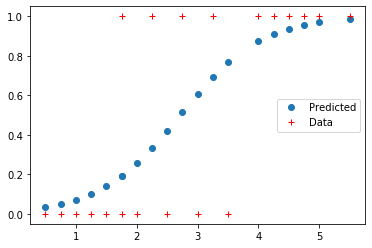

In [6]:
plt.plot(exam['Hours'], res.predict(), 'o', label = 'Predicted')
plt.plot(exam['Hours'], exam['Pass'], 'r+', label = 'Data')
plt.legend(loc = 'center right')
plt.show()

971 samples were processed


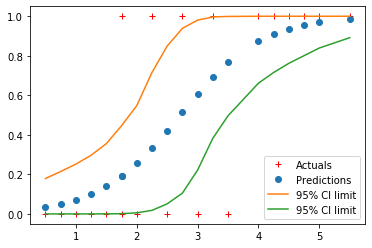

In [7]:
# Bootstrap mothod for confidence intervals

# Turn off statsmodels warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

    x = np.array(exam['Hours'])
    X = sm.add_constant(x)
    y = exam['Pass']

    preds = []

    # count holds successful fit run count
    count = 0

    for trial in range(1000):
    
        # get sub‐sample
        exam_sample = exam.sample(frac = 1,replace = True)
    
        # fit and predict
        try:
            x_sample = np.array(exam_sample['Hours'])
            X_sample = sm.add_constant(x_sample)
            y_sample = exam_sample['Pass']
            # disp=0 will suppress suprious convergece message
            res_sample = sm.Logit(y_sample,X_sample).fit(disp = 0)
            preds.append(res_sample.predict(X))
            count = count + 1
        except:
            pass
        # end try
    # end for

print(f'{count} samples were processed')
# get array of predictions into numpy format
predictions_array = np.array(preds)

plt.plot(exam['Hours'],exam['Pass'],'r+',label = 'Actuals')

plt.plot(exam['Hours'],res.predict(),'o',label = 'Predictions')

plt.plot(exam['Hours'], np.percentile(predictions_array, 97.5, axis = 0),label = '95% CI limit',)

plt.plot(exam['Hours'],np.percentile(predictions_array, 2.5, axis = 0),label = '95% CI limit',)

plt.legend(loc = 'lower right')